# TensorFlow Basic
- http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture8.pdf

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

### Tensorflow basic(non-eager API)

### constant

In [3]:
a = tf.constant(4)
b = tf.constant(5)
# 어느 위치에 무엇이 들어갈 것이다 정도만 정함

In [4]:
print(a)
print(b)

Tensor("Const:0", shape=(), dtype=int32)
Tensor("Const_1:0", shape=(), dtype=int32)


### Session

In [5]:
# launch the default graph
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(a+b))

4
5
9


### place holder와 feed_dict

In [6]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
# 메모리 자리만 차지하는 것, 데이터는 들어가 있지 않음

In [7]:
# define operations
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

In [8]:
# launch the default graph
with tf.Session() as sess: # with 구문은 구문 내 action이 유지됨
    print(sess.run(add, feed_dict={a:3, b:5}))
    print(sess.run(sub, feed_dict={a:3, b:5}))
    print(sess.run(mul, feed_dict={a:3, b:5}))
    print(sess.run(div, feed_dict={a:3, b:5}))
    # session 안에서 계산 이루어짐

8
-2
15
0.6


In [9]:
# matrix product
mat_1 = tf.constant([[1, 2], [3, 4]])
mat_2 = tf.constant([[4, 2], [3, 1]])

In [10]:
mat_product = tf.matmul(mat_1, mat_2) # 계산 정의

In [11]:
# launch the default graph
with tf.Session() as sess:
    print(sess.run(mat_product)) # 실제 계산

[[10  4]
 [24 10]]


In [12]:
hello = tf.constant("Hello, TF!")

In [13]:
sess = tf.Session()

In [14]:
print(sess.run(hello))

b'Hello, TF!'


---

### Tensorflow basic(eager API : define-by-run)

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.enable_eager_execution()
# session에 넣지 않아도 바로 결과가 나오게 됨
# 다시 kernel start해야 함

In [3]:
print("Without tf.Session")
a = tf.constant(4)
b = tf.constant(5)
print("%d" %(a + b))
print("%d" %(a - b))
print("%d" %(a * b))
print("%f" %(a / b))

Without tf.Session
9
-1
20
0.800000


In [4]:
# matrix product
mat_1 = tf.constant([[1, 2], [3, 4]])
mat_2 = tf.constant([[4, 2], [3, 1]])

In [5]:
tf.matmul(mat_1, mat_2)

<tf.Tensor: id=14, shape=(2, 2), dtype=int32, numpy=
array([[10,  4],
       [24, 10]])>

---

## Example - two-layer ReLU network on random data with L2 loss

# 1. Define and Run

In [3]:
################## Define ####################
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

################## Run ####################
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D),}
    out = sess.run([loss, grad_w1, grad_w2],
                      feed_dict=values)
    loss_val, grad_w1_val, grad_w2_val = out

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
loss_val

1965.2859

In [5]:
grad_w1_val

array([[-3.82833672e+01, -3.35135536e+01, -3.63155746e+01,
        -9.76173878e+00, -1.60995331e+01, -1.41146297e+01,
        -1.47303371e+01, -2.47750206e+01, -2.20260830e+01,
         7.05583096e-01],
       [ 7.53872375e+01, -2.26605339e+01,  4.16682129e+01,
         2.27443237e+01, -1.77522621e+01,  2.35183334e+00,
         5.20508051e+00,  3.70670471e+01, -1.33411732e+01,
         3.96862626e+00],
       [ 1.78546066e+01,  7.07962418e+00, -2.05781307e+01,
        -1.03850899e+01, -7.32878113e+00,  2.74836063e-01,
         1.61707211e+01,  4.48495865e+00, -4.20389175e+00,
        -3.45354605e+00],
       [-4.59407578e+01, -6.73509216e+01, -7.92681656e+01,
        -1.63957767e+01, -4.43689041e+01, -5.25798073e+01,
        -2.67093506e+01, -1.80262756e+01, -1.80874252e+00,
        -3.97180023e+01],
       [ 7.83300705e+01, -4.01895676e+01, -8.86270332e+00,
         4.56730986e+00, -4.09489136e+01,  1.79207230e+00,
         1.11029530e+01,  4.08731117e+01, -3.10354805e+01,
        -8.

# 2. Structure

In [ ]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))


##### Backward pass #####
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])


##### Enter a session #####
with tf.Session() as sess:

    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    out = sess.run([loss, grad_w1, grad_w2],
                      feed_dict=values)
    loss_val, grad_w1_val, grad_w2_val = out

- 일반적으로 딥러닝에서 같은 데이터를 여러번 반복해서 훈련하면서 weight를 update함
- 아래는 epoch 50을 주었을 때

In [20]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))


##### Backward pass #####
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

learning_rate=1e-5

##### Enter a session #####
with tf.Session() as sess:

    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        out = sess.run([loss, grad_w1, grad_w2],
                      feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val
        values[w2] -= learning_rate * grad_w2_val
        loss_val_list.append(loss_val)

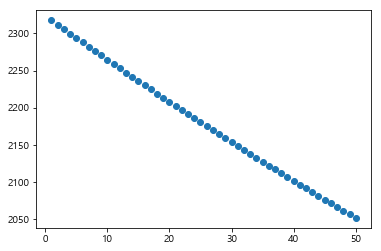

In [22]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(1, 51, 1), loss_val_list)

cf. numpy는 CPU에서 처리됨

TensorFlow는 별도의 지정사항이 없으면 GPU를 우선 사용한다. 따라서 Session 내에서의 연산은 GPU에서 진행됨.  
sess.run의 결과인 out은 그 결과값이 다시 CPU로 복사된 것.  
weight(w1, w2)를 업데이트하기 위해서 cpu -> gpu -> cpu -> gpu의 복사 과정이 반복되면서 속도 저하 발생  
따라서 weight가 cpu와 gpu를 순환하지 않고 gpu 상에서 유지되면서 값이 갱신되게 할 필요가 있다.

In [39]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
# Change w1 and w2 from placeholder to Variable
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))


##### Backward pass #####
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Add assign operations to update w1 and w2 as part of the graph
learning_rate=1e-5
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)

##### Enter a session #####
with tf.Session() as sess:
    # Run graph once to initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        out = sess.run([loss],
                      feed_dict=values)
        loss_val, = out
        loss_val_list.append(loss_val)

새로 계산한 w1, w2의 값이 갱신되게 하는 assign 연산을 추가하였다.  
그러나 아래를 보면 학습이 전혀 진행되지 않은 것을 볼 수 있다.  
이는 assign 연산을 정의만 했을 뿐, 실제로 session 상에서 실행하지 않았기 때문인데, sess.run에 이를 포함시키면 해결된다.

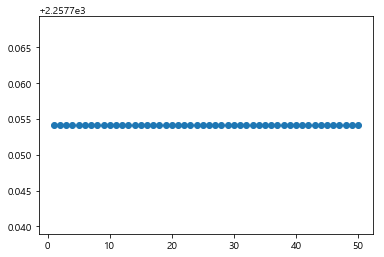

In [40]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(1, 51, 1), loss_val_list)

In [41]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
# Change w1 and w2 from placeholder to Variable
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

##### Backward pass #####
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Add assign operations to update w1 and w2 as part of the graph
learning_rate=1e-5
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)
# Add dummy graph node that depends on updates
updates = tf.group(new_w1, new_w2)


##### Enter a session #####
with tf.Session() as sess:
    # Run graph once to initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        loss_val, _ = sess.run([loss, updates],
                      feed_dict=values)
        loss_val_list.append(loss_val)

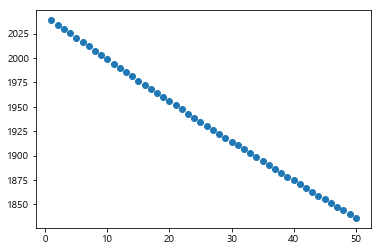

In [42]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(1, 51, 1), loss_val_list)

## **Optimizer**

```python
##### Backward pass #####
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Add assign operations to update w1 and w2 as part of the graph
learning_rate=1e-5
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)

# Add dummy graph node that depends on updates
updates = tf.group(new_w1, new_w2)
```

- gradients를 계산하여 weight를 update하는 위 코드를 다음과 같이 줄일 수 있다.

```python
optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)
```

In [ ]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
# Change w1 and w2 from placeholder to Variable
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

# ##### Backward pass #####
# grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# # Add assign operations to update w1 and w2 as part of the graph
# learning_rate=1e-5
# new_w1 = w1.assign(w1 - learning_rate * grad_w1)
# new_w2 = w2.assign(w2 - learning_rate * grad_w2)
# # Add dummy graph node that depends on updates
# updates = tf.group(new_w1, new_w2)

optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)


##### Enter a session #####
with tf.Session() as sess:
    # Run graph once to initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        loss_val, _ = sess.run([loss, updates],
                      feed_dict=values)
        loss_val_list.append(loss_val)

## **Loss**

```python
# L2 loss
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
```

- 또한 Loss를 위와 같이 직접 계산하지 않고 TensorFlow에서 제공하는  
사전에 정의된 loss를 사용할 수 있다.

```python
# Use predefined common lossees
loss = tf.losses.mean_squared_error(y_pred, y)
```

In [ ]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
# Change w1 and w2 from placeholder to Variable
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

##### Forward pass #####
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)

# # L2 loss
# diff = y_pred - y
# loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
# Use predefined common lossees
loss = tf.losses.mean_squared_error(y_pred, y)

# ##### Backward pass #####
optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)


##### Enter a session #####
with tf.Session() as sess:
    # Run graph once to initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        loss_val, _ = sess.run([loss, updates],
                      feed_dict=values)
        loss_val_list.append(loss_val)

## **Layers**

```python
# Weight Initialization
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

# Linear Layer + ReLU
h = tf.maximum(tf.matmul(x, w1), 0)
```

- 위 코드를 tensorflow의 내장 모듈을 사용해 간단하게 나타낼 수 있다.

```python
# Use Xavier initializer
init = tf.contrib.layers.xavier_initializer()

# tf.layers automatically sets up weight and bias
h = tf.layers.dense(inputs=x, units=H,
                   activation=tf.nn.relu, kernel_initializer=init)
y_pred = tf.layers.dense(inputs=h, units=D, kernel_initializer_init)
```

In [43]:
N, D, H = 32, 20, 10

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))

# # Change w1 and w2 from placeholder to Variable
# w1 = tf.Variable(tf.random_normal((D, H)))
# w2 = tf.Variable(tf.random_normal((H, D)))

# ##### Forward pass #####
# h = tf.maximum(tf.matmul(x, w1), 0)
# y_pred = tf.matmul(h, w2)

# Use Xavier initializer
init = tf.contrib.layers.xavier_initializer()

# tf.layers automatically sets up weight and bias
h = tf.layers.dense(inputs=x, units=H,
                   activation=tf.nn.relu, kernel_initializer=init)
y_pred = tf.layers.dense(inputs=h, units=D, kernel_initializer_init)

# # L2 loss
# Use predefined common lossees
loss = tf.losses.mean_squared_error(y_pred, y)

# ##### Backward pass #####
optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)


##### Enter a session #####
with tf.Session() as sess:
    # Run graph once to initialize w1 and w2
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}

    ##### Run the graph #####
    # Train the network
    loss_val_list = []
    for t in range(50):
        loss_val, _ = sess.run([loss, updates],
                      feed_dict=values)
        loss_val_list.append(loss_val)

Instructions for updating:
Use tf.cast instead.


# **Keras**

- tensorflow에서 모델링을 좀 더 쉽게 할 수 있도록 도와주는 High-level wrapper
- tensorflow를 backend로 하는 별도의 API였으나 2.0 버전에서 tensorflow에 내장됨.
- PyTorch와 유사하게 define by run의 형태로 작성 가능

In [44]:
# 구 코드
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

N, D, H = 64, 1000, 100
# Define model object as a sequence of layers
model = Sequential()
model.add(Dense(input_dim=D, output_dim=H))
model.add(Activation('relu'))
model.add(Dense(input_dim=H, output_dim=D))

# Define optimizer object
optimizer = SGD(lr=1e0)
# Build the model, specify loss function
model.compile(loss='mean_squared_error',
             optimizer=optimizer)

x = np.random.randn(N, D)
y = np.random.randn(N, D)
# Train the model
history = model.fit(x, y, nb_epoch=50,
                   batch_size=N, verbose=0)

C:\Users\dwkim\Anaconda3\envs\exercise\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1000, units=100)`
  if __name__ == '__main__':
C:\Users\dwkim\Anaconda3\envs\exercise\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1000)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dwkim\Anaconda3\envs\exercise\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


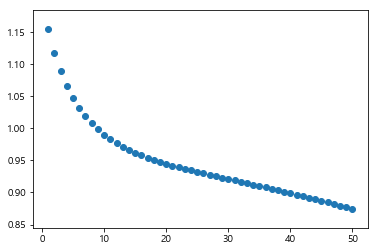

In [47]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(1, 51, 1), history.history["loss"])